# 1. Data Preprocessing and Splitting

### 1.1 Read the "Data.csv" file

In [11]:
import pandas as pd 

data = pd.read_csv("Data.csv", delimiter=',')
data

,name,dft_gibbs_free_energy_ev,dft_electronic_energy_ev,dft_entropy_ev,dft_enthalpy_ev,hf_gibbs_free_energy_ev,hf_electronic_energy_ev,hf_entropy_ev,hf_enthalpy_ev
0,dimer_001338,-16917.573481,-16925.578752,1.791468,-16915.782013,-16699.004234,-16708.542262,1.732034,-16697.272200
1,dimer_001340,-15834.675653,-15843.326901,1.798428,-15832.877225,-15625.077800,-15635.403855,1.730149,-15623.347651
2,dimer_001341,-16916.895225,-16924.923731,1.759009,-16915.136217,-16698.972462,-16708.490025,1.728173,-16697.244289
3,dimer_001343,-14897.694694,-14905.933900,1.622494,-14896.072200,-14700.613585,-14710.492825,1.568488,-14699.045097
4,dimer_001346,-14897.734585,-14905.936524,1.662438,-14896.072147,-14700.649672,-14710.478436,1.617040,-14699.032632
...,...,...,...,...,...,...,...,...,...
495,dimer_006866,-21012.703301,-21021.225137,1.712411,-21010.990890,-20749.312102,-20759.341495,1.684781,-20747.627320
496,dimer_006867,-21012.822136,-21021.382126,1.678073,-21011.144062,-20749.476476,-20759.553687,1.651282,-20747.825194
497,dimer_006868,-22968.461459,-22975.705901,1.679857,-22966.781601,-22687.402193,-22695.824857,1.667343,-22685.734851
498,dimer_006888,-21011.089783,-21019.404453,1.841686,-21009.248097,-20745.883071,-20755.660873,1.804790,-20744.078281


### 1.2 Define predictors and target

In [12]:
X = data[['hf_gibbs_free_energy_ev', 
          'hf_electronic_energy_ev',
          'hf_entropy_ev', 'hf_enthalpy_ev']]

y = data['dft_enthalpy_ev']

### 1.3 Split dataset into training and testing sets (80/20 split)

In [13]:
#!pip install scikit-learn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1.4 Scale data and save scaler

In [14]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# 2. Linear Regression

### 2.1 Train the Linear Regression model

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

### 2.2 Save the model weights for future use 

In [16]:
joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

### 2.3 Make predictions on the test set and calculate metrics

In [17]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score 
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)                     
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [18]:
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

MSE: 2.7446158657483806
RMSE: 1.6566882222519663
MAE: 1.4099289322978985
R^2: 0.9999991555188263


### 2.4 Visualize the results 

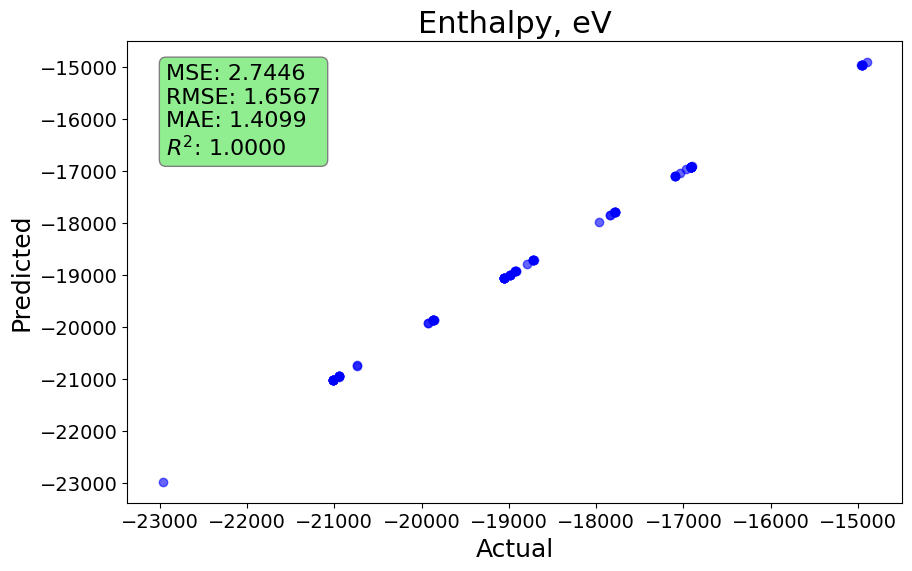

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.title("Enthalpy, eV", fontsize=22)
plt.grid(False)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#-# Add metrics to the plot
metrics_text = f"MSE: {mse:.4f}\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}\n$R^2$: {r2:.4f}"
plt.text(0.05, 0.95, metrics_text, transform=plt.gca().transAxes, fontsize=16, 
         verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='lightgreen'))

plt.show()

#-# Save actual and predicted values to a CSV file
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.to_csv('Linear_Regression(Act_vs_Pred).csv', index=False)